In [ ]:
# A. Identify the best-performing ML algorithm for an AML prediction model
# Install pycaret
!pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/HI-Small_Trans.csv')
print(df.shape)

(5078345, 11)


In [ ]:
# Create a subset of the dataset
data = df.sample(frac=0.1, random_state=67)
print(data.shape)
data.describe().transpose()

(507834, 11)


,count,mean,std,min,25%,50%,75%,max
From Bank,507834.0,4.585801e+04,8.187329e+04,1.000000,119.0000,9679.000,28690.0000,3.563000e+05
To Bank,507834.0,6.580232e+04,8.419274e+04,1.000000,4259.0000,21550.000,122151.0000,3.562830e+05
Amount Received,507834.0,4.189197e+06,2.917059e+08,0.000001,183.8325,1417.525,12314.3825,1.402124e+11
Amount Paid,507834.0,3.184836e+06,1.960888e+08,0.000001,185.0200,1421.620,12274.5550,9.094788e+10
Is Laundering,507834.0,1.073185e-03,3.274196e-02,0.000000,0.0000,0.000,0.0000,1.000000e+00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507834 entries, 2675272 to 3774954
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           507834 non-null  object 
 1   From Bank           507834 non-null  int64  
 2   Account             507834 non-null  object 
 3   To Bank             507834 non-null  int64  
 4   Account.1           507834 non-null  object 
 5   Amount Received     507834 non-null  float64
 6   Receiving Currency  507834 non-null  object 
 7   Amount Paid         507834 non-null  float64
 8   Payment Currency    507834 non-null  object 
 9   Payment Format      507834 non-null  object 
 10  Is Laundering       507834 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 46.5+ MB


In [ ]:
# Missing data handling
# Find the number of missing value in the dataset:
data.isnull().sum()

,0
Timestamp,0
From Bank,0
Account,0
To Bank,0
Account.1,0
Amount Received,0
Receiving Currency,0
Amount Paid,0
Payment Currency,0
Payment Format,0


In [ ]:
# Change data types
data['From Bank'] = data['From Bank'].astype('object')
data['To Bank'] = data['To Bank'].astype('object')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507834 entries, 2675272 to 3774954
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           507834 non-null  object 
 1   From Bank           507834 non-null  object 
 2   Account             507834 non-null  object 
 3   To Bank             507834 non-null  object 
 4   Account.1           507834 non-null  object 
 5   Amount Received     507834 non-null  float64
 6   Receiving Currency  507834 non-null  object 
 7   Amount Paid         507834 non-null  float64
 8   Payment Currency    507834 non-null  object 
 9   Payment Format      507834 non-null  object 
 10  Is Laundering       507834 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 46.5+ MB


In [ ]:
# Drop unnecessary feature
data = data.drop(columns=['Timestamp', 'Account', 'Account.1'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507834 entries, 2675272 to 3774954
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   From Bank           507834 non-null  object 
 1   To Bank             507834 non-null  object 
 2   Amount Received     507834 non-null  float64
 3   Receiving Currency  507834 non-null  object 
 4   Amount Paid         507834 non-null  float64
 5   Payment Currency    507834 non-null  object 
 6   Payment Format      507834 non-null  object 
 7   Is Laundering       507834 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 34.9+ MB


In [ ]:
data['Is Laundering'].value_counts()

,count
Is Laundering,
0,507289
1,545


<Axes: xlabel='Is Laundering'>

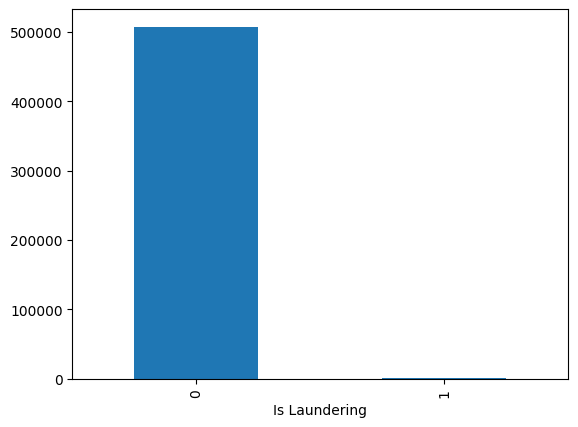

In [ ]:
# Plot target feature
data['Is Laundering'].value_counts().plot(kind='bar')

In [ ]:
from pycaret.classification import *
s = setup(data, train_size=0.7, target = 'Is Laundering', data_split_stratify=True, fix_imbalance=True, normalize=True, session_id=67)

,Description,Value
0,Session id,67
1,Target,Is Laundering
2,Target type,Binary
3,Original data shape,"(507834, 8)"
4,Transformed data shape,"(862555, 42)"
5,Transformed train set shape,"(710204, 42)"
6,Transformed test set shape,"(152351, 42)"
7,Numeric features,2
8,Categorical features,5
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9375,0.8266,0.4211,0.0072,0.0142,0.0121,0.0485
1,0.9296,0.9005,0.5789,0.0088,0.0173,0.0152,0.0650
2,0.9357,0.8956,0.4615,0.0079,0.0155,0.0134,0.0537
3,0.9351,0.8709,0.4737,0.0078,0.0154,0.0133,0.0543
4,0.9296,0.8160,0.3684,0.0056,0.0111,0.0090,0.0382
5,0.9322,0.8868,0.4474,0.0071,0.0139,0.0118,0.0494
6,0.9361,0.8779,0.4737,0.0079,0.0156,0.0135,0.0548
7,0.9357,0.8751,0.5000,0.0083,0.0164,0.0143,0.0581
8,0.9327,0.8892,0.4737,0.0075,0.0148,0.0127,0.0531


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9376,0.8268,0.4211,0.0072,0.0142,0.0121,0.0486
1,0.9295,0.9004,0.5789,0.0088,0.0172,0.0152,0.0649
2,0.9356,0.8955,0.4615,0.0079,0.0155,0.0133,0.0536
3,0.9351,0.8709,0.4737,0.0078,0.0154,0.0133,0.0543
4,0.9288,0.8124,0.3684,0.0056,0.0109,0.0089,0.0379
5,0.9320,0.8868,0.4474,0.0070,0.0139,0.0118,0.0494
6,0.9362,0.8777,0.4737,0.0079,0.0156,0.0136,0.0549
7,0.9360,0.8754,0.5263,0.0088,0.0173,0.0152,0.0617
8,0.9329,0.8892,0.4737,0.0076,0.0149,0.0128,0.0532


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


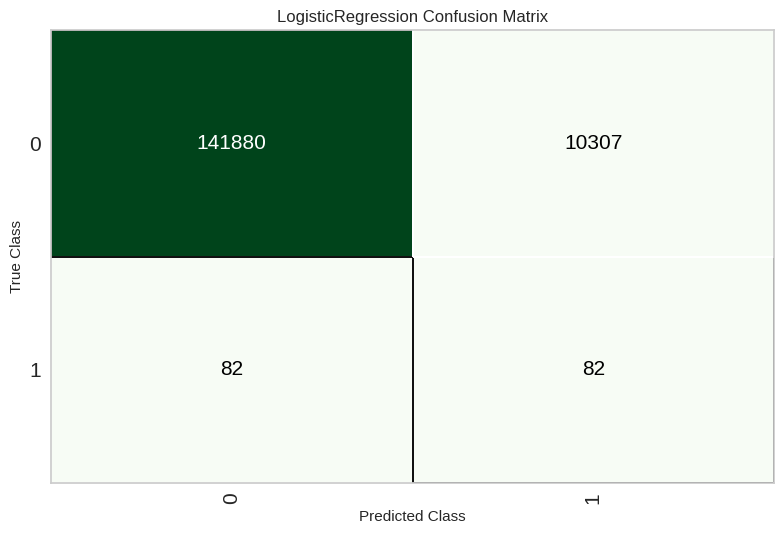

In [ ]:
# Create LR model
model_lr = create_model('lr')

# Tune LR model
tuned_lr = tune_model(model_lr, optimize = 'Recall', n_iter = 5)

# Analyse the confusion matrix
plot_model(tuned_lr, plot='confusion_matrix')

In [ ]:
# Predict on test sample
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9318,0.8779,0.5000,0.0079,0.0155,0.0134,0.0562


,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,prediction_label,prediction_score
3549272,15980,16733,1.598900e+02,US Dollar,1.598900e+02,US Dollar,Cash,0,0,0.9817
780594,1292,12719,1.137042e+06,US Dollar,1.137042e+06,US Dollar,Cheque,0,0,0.9947
1126126,1588,226331,5.384600e+02,US Dollar,5.384600e+02,US Dollar,Cheque,0,0,0.9931
3522745,22,6030,5.054970e+03,Euro,5.054970e+03,Euro,Wire,0,0,1.0000
3445950,2591,20861,5.112000e+01,Euro,5.112000e+01,Euro,Credit Card,0,0,0.9741
...,...,...,...,...,...,...,...,...,...,...
3852828,10,118,1.156800e+02,Swiss Franc,1.156800e+02,Swiss Franc,Cheque,0,0,0.9099
3356689,1655,5464,1.093700e+02,Euro,1.093700e+02,Euro,Cheque,0,0,0.9917
175661,129076,129076,1.067520e+03,Euro,1.067520e+03,Euro,Reinvestment,0,0,1.0000
550233,16535,12446,2.915900e+02,US Dollar,2.915900e+02,US Dollar,Cheque,0,0,0.9946


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9385,0.8122,0.3947,0.0069,0.0135,0.0115,0.0455
1,0.9296,0.8874,0.5789,0.0088,0.0173,0.0152,0.0649
2,0.9298,0.8850,0.3846,0.0060,0.0119,0.0097,0.0409
3,0.9336,0.8592,0.4211,0.0068,0.0134,0.0113,0.0467
4,0.9238,0.8105,0.2895,0.0041,0.0081,0.0060,0.0264
5,0.9273,0.8786,0.3947,0.0058,0.0115,0.0094,0.0407
6,0.9352,0.8611,0.3947,0.0065,0.0129,0.0108,0.0439
7,0.9364,0.8624,0.5000,0.0084,0.0165,0.0144,0.0585
8,0.9307,0.8797,0.5000,0.0077,0.0152,0.0131,0.0555


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8782,0.8580,0.8158,0.0071,0.0141,0.0120,0.0692
1,0.8803,0.9231,0.8947,0.0079,0.0157,0.0136,0.0778
2,0.8786,0.9254,0.9487,0.0085,0.0169,0.0147,0.0836
3,0.8798,0.8897,0.8158,0.0072,0.0143,0.0122,0.0697
4,0.8777,0.8425,0.7895,0.0069,0.0136,0.0115,0.0664
5,0.8788,0.9085,0.8947,0.0078,0.0155,0.0134,0.0772
6,0.8795,0.8972,0.8947,0.0079,0.0156,0.0135,0.0775
7,0.8824,0.8975,0.8684,0.0078,0.0155,0.0135,0.0760
8,0.8798,0.9058,0.8947,0.0079,0.0157,0.0136,0.0776


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


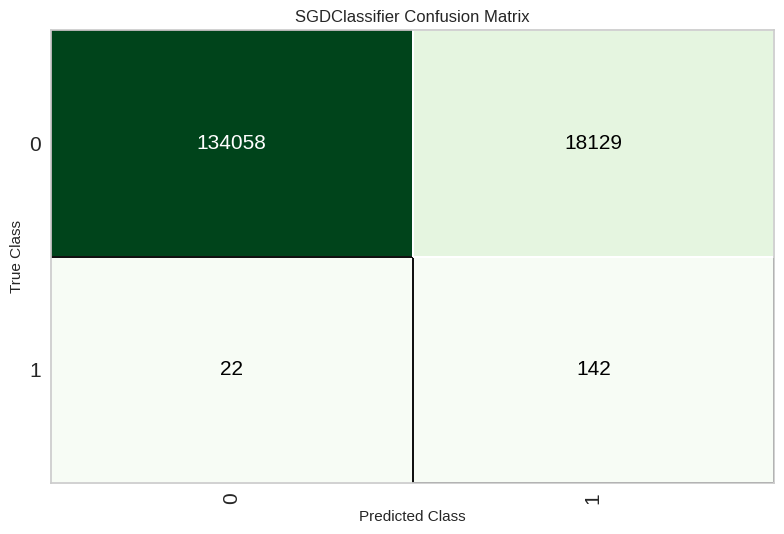

In [ ]:
# Create SVM model
model_svm = create_model('svm')

# Tune SVM model
tuned_svm = tune_model(model_svm, optimize = 'Recall', n_iter = 5)

# Analyse the confusion matrix
plot_model(tuned_svm, plot='confusion_matrix')

In [ ]:
# Predict on test sample
predict_model(tuned_svm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8809,0.8734,0.8659,0.0078,0.0154,0.0133,0.0754


,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,prediction_label
3549272,15980,16733,1.598900e+02,US Dollar,1.598900e+02,US Dollar,Cash,0,0
780594,1292,12719,1.137042e+06,US Dollar,1.137042e+06,US Dollar,Cheque,0,0
1126126,1588,226331,5.384600e+02,US Dollar,5.384600e+02,US Dollar,Cheque,0,0
3522745,22,6030,5.054970e+03,Euro,5.054970e+03,Euro,Wire,0,0
3445950,2591,20861,5.112000e+01,Euro,5.112000e+01,Euro,Credit Card,0,0
...,...,...,...,...,...,...,...,...,...
3852828,10,118,1.156800e+02,Swiss Franc,1.156800e+02,Swiss Franc,Cheque,0,0
3356689,1655,5464,1.093700e+02,Euro,1.093700e+02,Euro,Cheque,0,0
175661,129076,129076,1.067520e+03,Euro,1.067520e+03,Euro,Reinvestment,0,0
550233,16535,12446,2.915900e+02,US Dollar,2.915900e+02,US Dollar,Cheque,0,0


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9974,0.5190,0.0263,0.0175,0.0211,0.0198,0.0202
1,0.9977,0.6731,0.0526,0.0435,0.0476,0.0465,0.0467
2,0.9981,0.4837,0.0769,0.0909,0.0833,0.0824,0.0827
3,0.9977,0.6906,0.0000,0.0000,0.0000,-0.0011,-0.0011
4,0.9981,0.5569,0.0789,0.0811,0.0800,0.0790,0.0790
5,0.9977,0.6358,0.0526,0.0435,0.0476,0.0465,0.0467
6,0.9975,0.5797,0.0789,0.0526,0.0632,0.0620,0.0632
7,0.9980,0.6330,0.0000,0.0000,0.0000,-0.0010,-0.0010
8,0.9981,0.5845,0.0789,0.0811,0.0800,0.0790,0.0790


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:16:02
Status,. . . . . . . . . . . . . . . . . .,Compiling Final Results
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8811,0.8325,0.8158,0.0073,0.0145,0.0124,0.0702
1,0.8829,0.9107,0.8947,0.0081,0.0161,0.0140,0.0788
2,0.8809,0.9251,0.9487,0.0087,0.0172,0.0150,0.0845
3,0.8829,0.8798,0.8158,0.0074,0.0147,0.0126,0.0708
4,0.8800,0.8220,0.7895,0.0070,0.0139,0.0118,0.0672
5,0.8815,0.8944,0.8947,0.0080,0.0159,0.0138,0.0783
6,0.8824,0.8805,0.8947,0.0081,0.0160,0.0139,0.0786
7,0.8849,0.8829,0.8684,0.0080,0.0159,0.0138,0.0769
8,0.8830,0.8757,0.8684,0.0079,0.0156,0.0135,0.0762


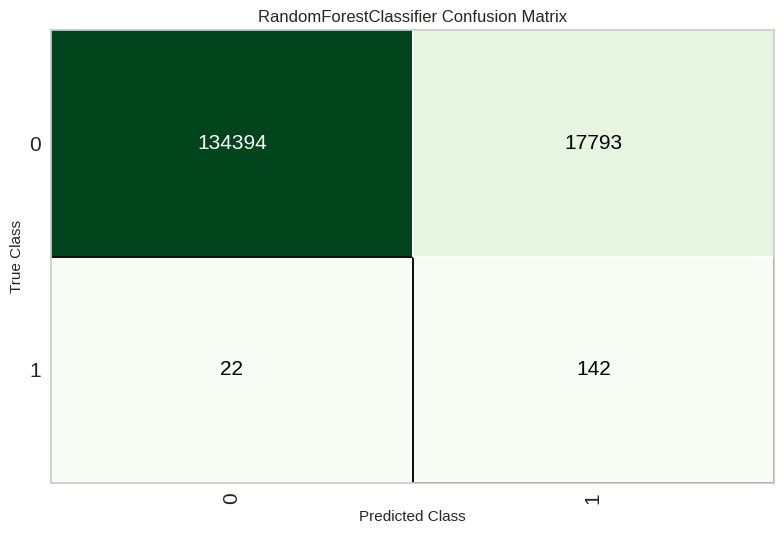

In [ ]:
# Create RF model
model_rf = create_model('rf')

# Tune RF model
tuned_rf = tune_model(model_rf, optimize = 'Recall', n_iter = 5)

# Analyse the confusion matrix
plot_model(tuned_rf, plot='confusion_matrix')

In [ ]:
# Predict on test sample
predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8831,0.8745,0.8659,0.0079,0.0157,0.0136,0.0762


,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,prediction_label,prediction_score
3549272,15980,16733,1.598900e+02,US Dollar,1.598900e+02,US Dollar,Cash,0,0,0.5537
780594,1292,12719,1.137042e+06,US Dollar,1.137042e+06,US Dollar,Cheque,0,0,0.5537
1126126,1588,226331,5.384600e+02,US Dollar,5.384600e+02,US Dollar,Cheque,0,0,0.5537
3522745,22,6030,5.054970e+03,Euro,5.054970e+03,Euro,Wire,0,0,0.5537
3445950,2591,20861,5.112000e+01,Euro,5.112000e+01,Euro,Credit Card,0,0,0.5537
...,...,...,...,...,...,...,...,...,...,...
3852828,10,118,1.156800e+02,Swiss Franc,1.156800e+02,Swiss Franc,Cheque,0,0,0.5537
3356689,1655,5464,1.093700e+02,Euro,1.093700e+02,Euro,Cheque,0,0,0.5537
175661,129076,129076,1.067520e+03,Euro,1.067520e+03,Euro,Reinvestment,0,0,0.5537
550233,16535,12446,2.915900e+02,US Dollar,2.915900e+02,US Dollar,Cheque,0,0,0.5537


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9884,0.8118,0.1316,0.0130,0.0236,0.0217,0.0381
1,0.9911,0.8267,0.1053,0.0139,0.0245,0.0227,0.0355
2,0.9883,0.7857,0.1169,0.0116,0.0212,0.0192,0.0336
3,0.9876,0.8298,0.0921,0.0085,0.0156,0.0137,0.0246
4,0.9875,0.7973,0.1579,0.0144,0.0263,0.0244,0.0443
Mean,0.9886,0.8103,0.1207,0.0123,0.0222,0.0203,0.0352
Std,0.0013,0.0169,0.0227,0.0021,0.0037,0.0037,0.0064


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9713,0.8208,0.3421,0.0129,0.0249,0.0229,0.0619
1,0.9749,0.8491,0.2632,0.0115,0.0220,0.0199,0.0504
2,0.9685,0.8228,0.1688,0.0059,0.0115,0.0094,0.0263
3,0.9711,0.8463,0.3289,0.0123,0.0237,0.0217,0.0590
4,0.9726,0.8110,0.2632,0.0104,0.0201,0.0181,0.0477
Mean,0.9717,0.8300,0.2732,0.0106,0.0204,0.0184,0.0491
Std,0.0021,0.0150,0.0616,0.0025,0.0048,0.0048,0.0125


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 5 candidates, totalling 25 fits


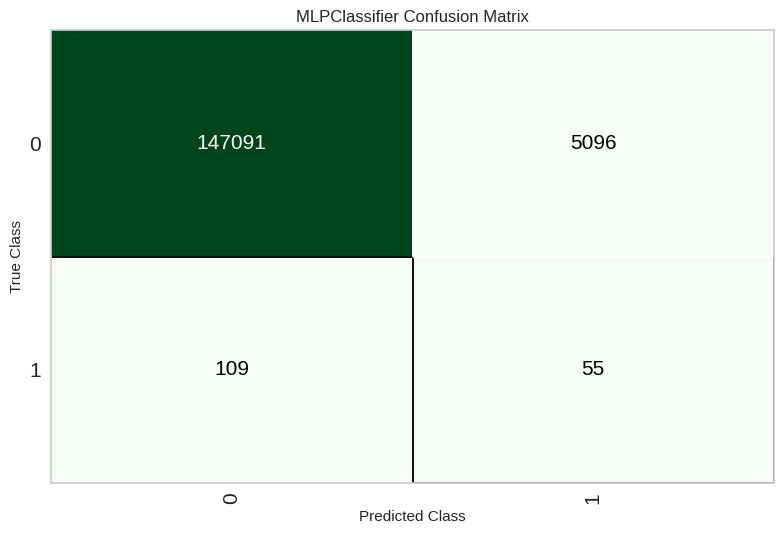

In [ ]:
# Create ANN model
model_ann = create_model('mlp', fold = 5)

# Tune ANN model
tuned_ann = tune_model(model_ann, optimize = 'Recall', n_iter = 5, fold = 5)

# Analyse the confusion matrix
plot_model(tuned_ann, plot='confusion_matrix')

In [ ]:
# Predict on test sample
predict_model(tuned_ann)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,MLP Classifier,0.9658,0.8389,0.3354,0.0107,0.0207,0.0186,0.0548


,From Bank,To Bank,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering,prediction_label,prediction_score
3549272,15980,16733,1.598900e+02,US Dollar,1.598900e+02,US Dollar,Cash,0,0,0.9977
780594,1292,12719,1.137042e+06,US Dollar,1.137042e+06,US Dollar,Cheque,0,0,0.9993
1126126,1588,226331,5.384600e+02,US Dollar,5.384600e+02,US Dollar,Cheque,0,0,0.9987
3522745,22,6030,5.054970e+03,Euro,5.054970e+03,Euro,Wire,0,0,1.0000
3445950,2591,20861,5.112000e+01,Euro,5.112000e+01,Euro,Credit Card,0,0,0.9934
...,...,...,...,...,...,...,...,...,...,...
3852828,10,118,1.156800e+02,Swiss Franc,1.156800e+02,Swiss Franc,Cheque,0,0,0.9909
3356689,1655,5464,1.093700e+02,Euro,1.093700e+02,Euro,Cheque,0,0,0.9986
175661,129076,129076,1.067520e+03,Euro,1.067520e+03,Euro,Reinvestment,0,0,1.0000
550233,16535,12446,2.915900e+02,US Dollar,2.915900e+02,US Dollar,Cheque,0,0,0.9993


In [ ]:
# B. Use graph database Neo4j to detect smurfing
!pip install neo4j

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 kB 8.2 MB/s eta 0:00:00


In [ ]:
from neo4j import GraphDatabase
import math

In [ ]:
NEO4J_URI = "neo4j+s://2acef9d6.databases.neo4j.io"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "DZY82tIGC_1n7GoX3glW5MFLu8D6S7ea8BVI7RnB-9k"

In [ ]:
# Recall the same subset of the dataset
data_smurf = df.sample(frac=0.1, random_state=67)
print(data_smurf.shape)
data_smurf.info()

(507834, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 507834 entries, 2675272 to 3774954
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Timestamp           507834 non-null  object 
 1   From Bank           507834 non-null  int64  
 2   Account             507834 non-null  object 
 3   To Bank             507834 non-null  int64  
 4   Account.1           507834 non-null  object 
 5   Amount Received     507834 non-null  float64
 6   Receiving Currency  507834 non-null  object 
 7   Amount Paid         507834 non-null  float64
 8   Payment Currency    507834 non-null  object 
 9   Payment Format      507834 non-null  object 
 10  Is Laundering       507834 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 46.5+ MB


In [ ]:
# Drop unnecessary feature
data_smurf = data_smurf.drop(columns=['From Bank', 'To Bank','Amount Received', 'Receiving Currency', 'Payment Currency', 'Payment Format', 'Is Laundering'])

data_smurf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507834 entries, 2675272 to 3774954
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Timestamp    507834 non-null  object 
 1   Account      507834 non-null  object 
 2   Account.1    507834 non-null  object 
 3   Amount Paid  507834 non-null  float64
dtypes: float64(1), object(3)
memory usage: 19.4+ MB


In [ ]:
# Rename features
data_smurf = data_smurf.rename(columns={'Account': 'From Account'})
data_smurf = data_smurf.rename(columns={'Account.1': 'To Account'})

# Change data type
data_smurf['Timestamp'] = pd.to_datetime(data_smurf['Timestamp'], format='%Y/%m/%d %H:%M', errors='coerce')

data_smurf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507834 entries, 2675272 to 3774954
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Timestamp     507834 non-null  datetime64[ns]
 1   From Account  507834 non-null  object        
 2   To Account    507834 non-null  object        
 3   Amount Paid   507834 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 19.4+ MB


In [ ]:
# Define Neo4j functions
def run_query(driver, query, parameters=None):
    with driver.session() as session:
        result = session.run(query, parameters)
        return [record.data() for record in result]

def load_data_to_neo4j(driver, data_smurf):
    run_query(driver, "MATCH (n) DETACH DELETE n")
    run_query(driver, "CREATE CONSTRAINT account_unique IF NOT EXISTS FOR (a:Account) REQUIRE a.id IS UNIQUE")

    upload_query = """
    UNWIND $rows AS row
    MERGE (source:Account {id: row.`From Account`})
    MERGE (beneficiary:Account {id: row.`To Account`})
    CREATE (source)-[t:TRANSACTION {
        amount: row.`Amount Paid`,
        timestamp: datetime(row.Timestamp)
    }]->(beneficiary)
    """

    batch_size = 1000
    total_rows = len(data_smurf)
    num_batches = math.ceil(total_rows / batch_size)

    for i in range(num_batches):
        start_index = i * batch_size
        end_index = min((i + 1) * batch_size, total_rows)
        batch_df = data_smurf.iloc[start_index:end_index]

        rows = batch_df.to_dict('records')
        run_query(driver, upload_query, parameters={'rows': rows})

def detect_smurfing(driver, threshold=10000, min_transactions=5, min_total_amount=10000):
    smurfing_query = """
    MATCH (source:Account)-[t:TRANSACTION]->(beneficiary:Account)
    WHERE t.amount < $threshold
    WITH source, beneficiary, count(t) AS transactionCount, sum(t.amount) AS totalAmount
    WHERE transactionCount >= $min_transactions AND totalAmount > $min_total_amount
    RETURN
        source.id AS SourceAccount,
        beneficiary.id AS BeneficiaryAccount,
        transactionCount,
        totalAmount
    ORDER BY transactionCount DESC, totalAmount DESC
    """
    parameters = {'threshold': threshold, 'min_transactions': min_transactions, 'min_total_amount': min_total_amount}
    results = run_query(driver, smurfing_query, parameters)

    if not results:
        print("No smurfing patterns found.")
        return

    print("--- Smurfing Detection Results ---")
    for record in results:
        print(
            f"Source: {record['SourceAccount']} -> Beneficiary: {record['BeneficiaryAccount']} | "
            f"Count: {record['transactionCount']} | "
            f"Total Amount: ${record['totalAmount']:.2f}"
        )

    results_df = pd.DataFrame(results)
    results_df.to_excel("smurfing_results.xlsx", index=False)

    return results_df

In [ ]:
if __name__ == "__main__":
    driver = None
    try:
        driver = GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD))
        driver.verify_connectivity()

        load_data_to_neo4j(driver, data_smurf)
        detect_smurfing(driver)

    except Exception as e:
        print(f"\nAn error occurred: {e}")

    finally:
        if driver:
            driver.close()

--- Smurfing Detection Results ---
Source: 80DB92B20 -> Beneficiary: 80E262390 | Count: 11 | Total Amount: $17218.90
Source: 80167E1A0 -> Beneficiary: 8032C3860 | Count: 11 | Total Amount: $17023.53
Source: 808F15820 -> Beneficiary: 80D22ED60 | Count: 10 | Total Amount: $57137.17
Source: 8005AF820 -> Beneficiary: 8026961F0 | Count: 10 | Total Amount: $56130.78
Source: 80FD5D680 -> Beneficiary: 80FF9A420 | Count: 10 | Total Amount: $50889.31
Source: 80B8ECFF0 -> Beneficiary: 80CAB2340 | Count: 10 | Total Amount: $10525.49
Source: 80EBA2D50 -> Beneficiary: 80F03E0E0 | Count: 9 | Total Amount: $72954.56
Source: 811A0B440 -> Beneficiary: 8143C94D0 | Count: 9 | Total Amount: $41245.28
Source: 81015D050 -> Beneficiary: 810349E80 | Count: 9 | Total Amount: $33885.56
Source: 100428660 -> Beneficiary: 80B9344C0 | Count: 9 | Total Amount: $32886.83
Source: 800E99460 -> Beneficiary: 801010A90 | Count: 9 | Total Amount: $31175.76
Source: 8087642F0 -> Beneficiary: 80A4FCE20 | Count: 9 | Total Amoun